![](https://gowithcode.com/wp-content/uploads/2021/04/top-programming-languages.jpg)

In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/programming-languages/languages.csv')

# Step 3: Basic exploratory analysis
# Display the first few rows of the dataset
print(df.head())

      pldb_id       title description           type  appeared  \
0        java        Java         NaN             pl      1995   
1  javascript  JavaScript         NaN             pl      1995   
2           c           C         NaN             pl      1972   
3      python      Python         NaN             pl      1991   
4         sql         SQL         NaN  queryLanguage      1974   

                                    creators                   website  \
0                              James Gosling  https://oracle.com/java/   
1                               Brendan Eich                       NaN   
2                             Dennis Ritchie                       NaN   
3                           Guido van Rossum   https://www.python.org/   
4  Donald D. Chamberlin and Raymond F. Boyce                       NaN   

  domain_name  domain_name_registered  \
0         NaN                     NaN   
1         NaN                     NaN   
2         NaN                     N

In [2]:
# Get summary statistics of the dataset
print(df.describe())

# Check the data types of each column
print(df.dtypes)

          appeared  domain_name_registered       isbndb   book_count  \
count  4303.000000              502.000000  1086.000000  4303.000000   
mean   1991.105275             2011.332669     7.706262     2.079479   
std     111.443382                7.021132    33.164209    17.344654   
min   -2000.000000             1990.000000     0.000000     0.000000   
25%    1984.000000             2007.000000     0.000000     0.000000   
50%    1997.000000             2013.000000     0.000000     0.000000   
75%    2012.000000             2017.000000     2.000000     0.000000   
max    2023.000000             2023.000000   400.000000   401.000000   

       semantic_scholar  language_rank  github_repo_stars  github_repo_forks  \
count        758.000000    4303.000000         889.000000         886.000000   
mean           3.794195    2151.000000        2127.402700         261.286682   
std            8.316231    1242.313433        7554.016422        1203.002760   
min            0.000000       0

In [3]:
df.columns

Index(['pldb_id', 'title', 'description', 'type', 'appeared', 'creators',
       'website', 'domain_name', 'domain_name_registered', 'reference',
       'isbndb', 'book_count', 'semantic_scholar', 'language_rank',
       'github_repo', 'github_repo_stars', 'github_repo_forks',
       'github_repo_updated', 'github_repo_subscribers', 'github_repo_created',
       'github_repo_description', 'github_repo_issues',
       'github_repo_first_commit', 'github_language',
       'github_language_tm_scope', 'github_language_type',
       'github_language_ace_mode', 'github_language_file_extensions',
       'github_language_repos', 'wikipedia', 'wikipedia_daily_page_views',
       'wikipedia_backlinks_count', 'wikipedia_summary', 'wikipedia_page_id',
       'wikipedia_appeared', 'wikipedia_created', 'wikipedia_revision_count',
       'wikipedia_related', 'features_has_comments',
       'features_has_semantic_indentation', 'features_has_line_comments',
       'line_comment_token', 'last_activity',

In [4]:
# Check for missing values
print(df.isnull().sum())

pldb_id                                 0
title                                   0
description                          3480
type                                    0
appeared                                0
creators                             3203
website                              2928
domain_name                          3588
domain_name_registered               3801
reference                            2314
isbndb                               3217
book_count                              0
semantic_scholar                     3545
language_rank                           0
github_repo                          3402
github_repo_stars                    3414
github_repo_forks                    3417
github_repo_updated                  3418
github_repo_subscribers              3418
github_repo_created                  3425
github_repo_description              3438
github_repo_issues                   3518
github_repo_first_commit             3567
github_language                   

### Data Cleaning

In [5]:
def data_clean(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64'])
    # Select object columns
    object_columns = df.select_dtypes(include=['object'])
    
    # Fill missing values in numeric columns with 0
    df[numeric_columns.columns] = df[numeric_columns.columns].fillna(0)
    # Fill missing values in object columns with "No"
    df[object_columns.columns] = df[object_columns.columns].fillna("No")
    
    # Drop columns from index 7 to 42
    df.drop(df.columns[7:43], axis=1, inplace=True)
    # Drop specific columns
    df.drop(['file_type', 'is_open_source', 'central_package_repository_count'], axis=1, inplace=True)
    
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    
    return df

### Data Analysis

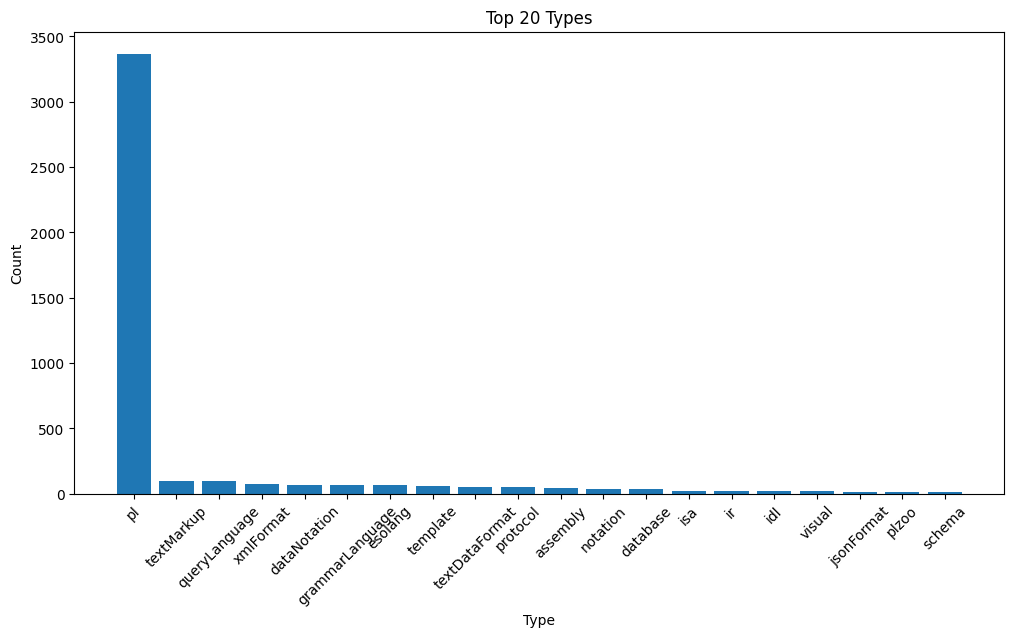

In [6]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each 'type'
type_counts = df['type'].value_counts().head(20)  # Select the top 20 values

# Plot a bar chart for the top 20 values
plt.figure(figsize=(12, 6))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Top 20 Types')
plt.xticks(rotation=45)
plt.show()

### Top 20 Software Languages by Number of Users

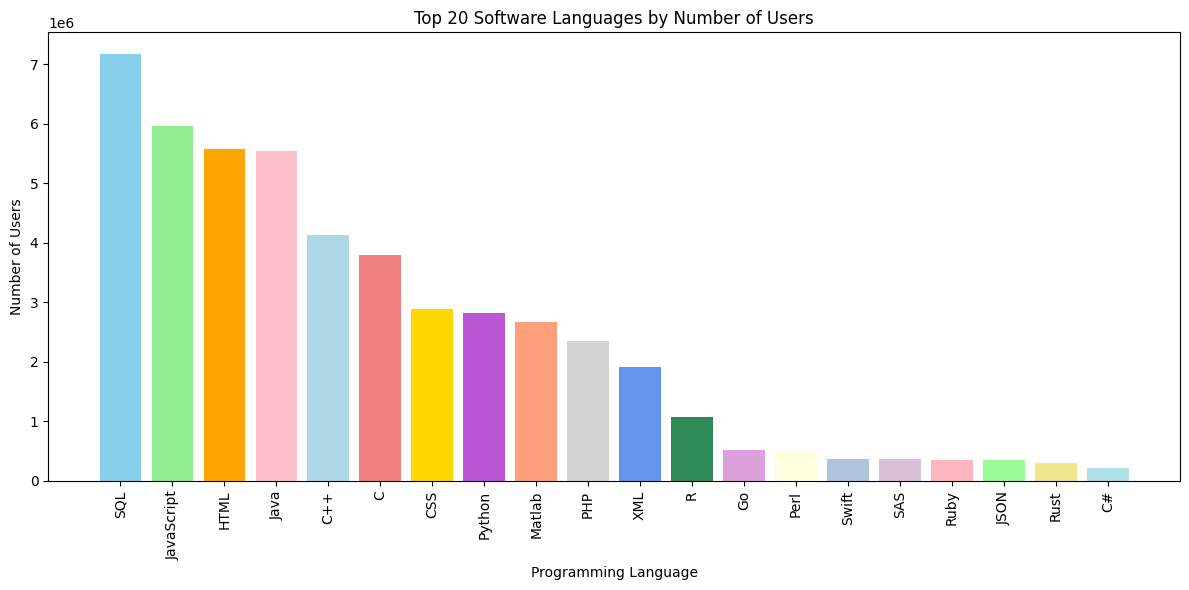

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a pandas DataFrame called 'df'
language_users = df[['github_language', 'number_of_users']]
language_users_grouped = language_users.groupby('github_language').sum()
language_users_top20 = language_users_grouped.nlargest(20, 'number_of_users')

# Define custom colors for the bar chart
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'lightblue', 'lightcoral', 'gold', 'mediumorchid',
          'lightsalmon', 'lightgray', 'cornflowerblue', 'seagreen', 'plum', 'lightyellow', 'lightsteelblue',
          'thistle', 'lightpink', 'palegreen', 'khaki', 'powderblue']

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(language_users_top20.index, language_users_top20['number_of_users'], color=colors)
plt.xlabel('Programming Language')
plt.ylabel('Number of Users')
plt.title('Top 20 Software Languages by Number of Users')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

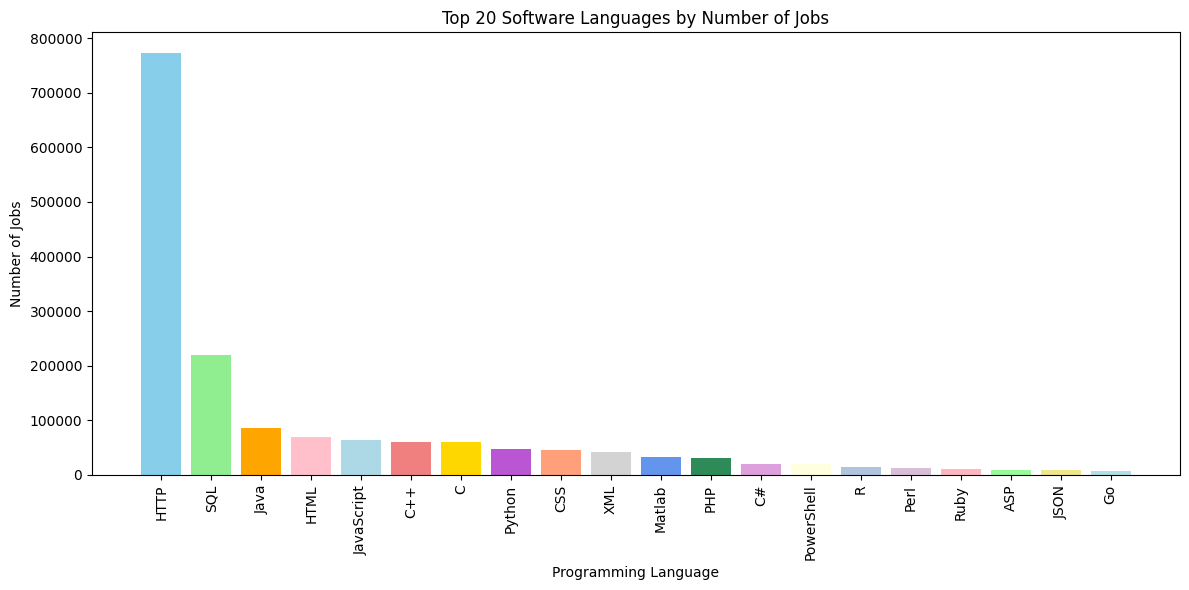

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a pandas DataFrame called 'df'
language_jobs = df[['github_language', 'number_of_jobs']]
language_jobs_grouped = language_jobs.groupby('github_language').sum()
language_jobs_top20 = language_jobs_grouped.nlargest(20, 'number_of_jobs')

# Define custom colors for the bar chart
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'lightblue', 'lightcoral', 'gold', 'mediumorchid',
          'lightsalmon', 'lightgray', 'cornflowerblue', 'seagreen', 'plum', 'lightyellow', 'lightsteelblue',
          'thistle', 'lightpink', 'palegreen', 'khaki', 'powderblue']

# Plotting the bar chart with colors
plt.figure(figsize=(12, 6))
plt.bar(language_jobs_top20.index, language_jobs_top20['number_of_jobs'], color=colors)
plt.xlabel('Programming Language')
plt.ylabel('Number of Jobs')
plt.title('Top 20 Software Languages by Number of Jobs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

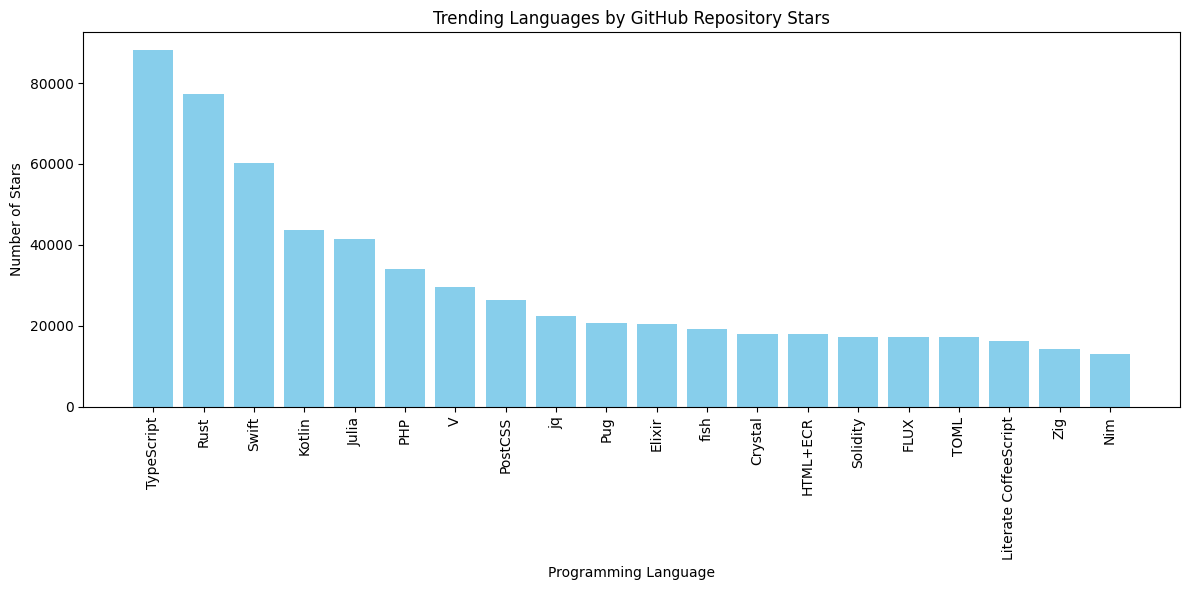

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a pandas DataFrame called 'df'
language_stars = df[['github_language', 'github_repo_stars']]
language_stars_grouped = language_stars.groupby('github_language').sum()
language_stars_top20 = language_stars_grouped.nlargest(20, 'github_repo_stars')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(language_stars_top20.index, language_stars_top20['github_repo_stars'], color='skyblue')
plt.xlabel('Programming Language')
plt.ylabel('Number of Stars')
plt.title('Trending Languages by GitHub Repository Stars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
df.head(1)

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN


### Group the data by programming language and count the number of books

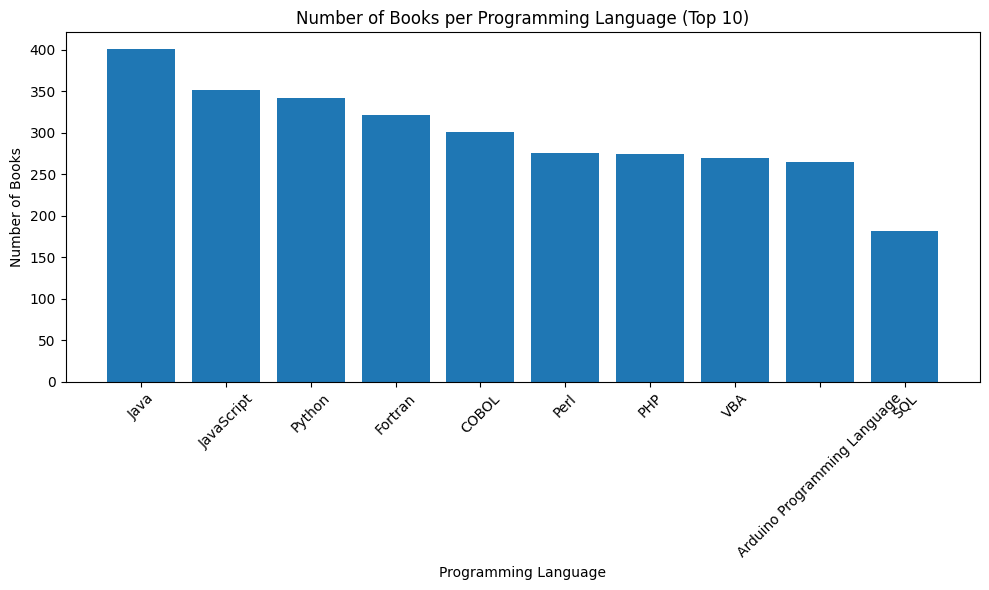

In [11]:
# Group the data by programming language and count the number of books
books_count = df.groupby('title')['book_count'].sum().reset_index()

# Sort the data by book count in descending order
books_count = books_count.sort_values(by='book_count', ascending=False)

# Select the top 10 programming languages
top_10_languages = books_count.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_languages['title'], top_10_languages['book_count'])
plt.xlabel('Programming Language')
plt.ylabel('Number of Books')
plt.title('Number of Books per Programming Language (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Count the number of programming languages per type

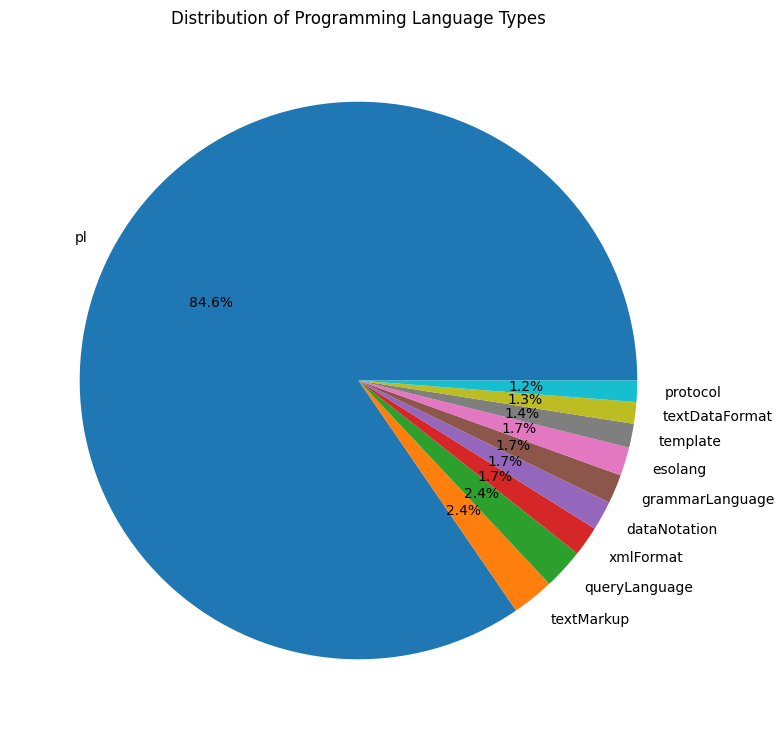

In [12]:
# Count the number of programming languages per type
language_types = df['type'].value_counts()

top_10_language_types = language_types.head(10)
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_language_types, labels=top_10_language_types.index, autopct='%1.1f%%')
plt.title('Distribution of Programming Language Types')
plt.tight_layout()
plt.show()

### GitHub Repository Stars vs. Forks

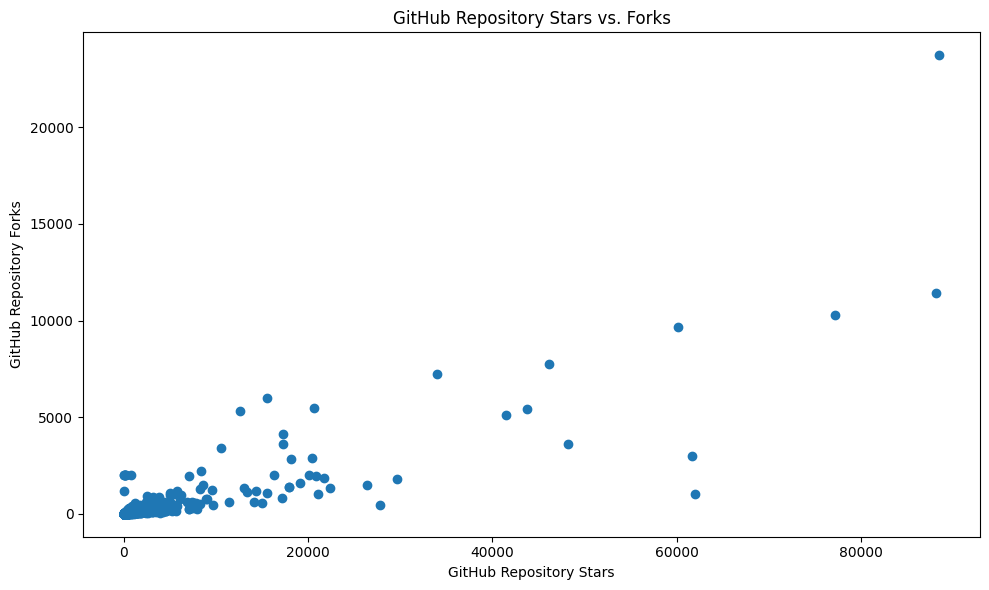

In [13]:
# Filter out rows with missing values in the relevant columns
filtered_data = df.dropna(subset=['github_repo_stars', 'github_repo_forks'])

filtered_data.loc[:, 'github_repo_stars'] = pd.to_numeric(filtered_data['github_repo_stars'])
filtered_data.loc[:, 'github_repo_forks'] = pd.to_numeric(filtered_data['github_repo_forks'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['github_repo_stars'], filtered_data['github_repo_forks'])
plt.xlabel('GitHub Repository Stars')
plt.ylabel('GitHub Repository Forks')
plt.title('GitHub Repository Stars vs. Forks')
plt.tight_layout()
plt.show()

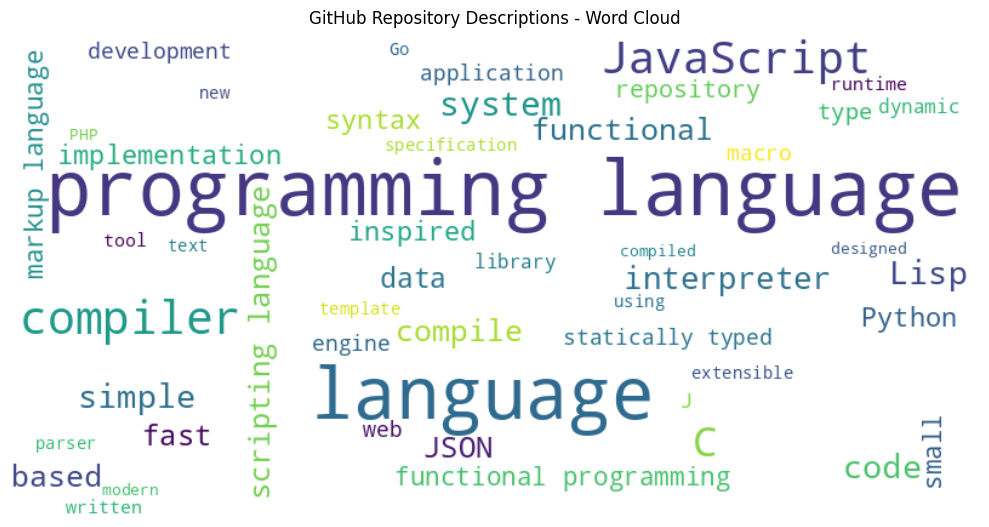

In [14]:
from wordcloud import WordCloud


# Filter out rows with missing values in the relevant column
filtered_data = df.dropna(subset=['github_repo_description'])

# Concatenate all the descriptions into a single string
descriptions = ' '.join(filtered_data['github_repo_description'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('GitHub Repository Descriptions - Word Cloud')
plt.tight_layout()
plt.show()

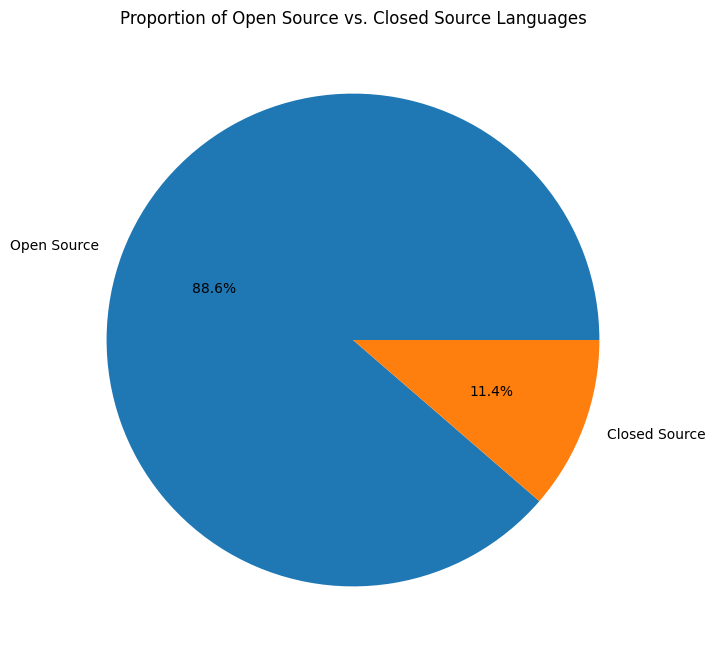

In [15]:
plt.figure(figsize=(8, 8))
df['is_open_source'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Open Source', 'Closed Source'])
plt.title('Proportion of Open Source vs. Closed Source Languages')
plt.ylabel('')
plt.show()